In [1]:
# standard imports
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
#import pygmt
from pyproj import Proj, Geod
from osgeo import gdal

import sys
sys.path.append('/Users/chanagan/Documents/GitHub/ImageryResources/Functions/')
import TiffTools as tt

# reload modules when changed
%reload_ext autoreload
%autoreload 2

In [4]:
# Read in files
iminc = gdal.Open('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/OtherDeformationMeasurements/UAVSAR/MR_inc.tif')
imlosv = gdal.Open('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MRMRWV2009to2023/OtherDeformationMeasurements/UAVSAR/MR_uavlosv.tif')

In [18]:
# Use inc and azi to transform uavsar los to EWU
inc = iminc.GetRasterBand(1).ReadAsArray()
losv = imlosv.GetRasterBand(1).ReadAsArray()
azi = np.ones((np.shape(inc)))*230
azi = 180-azi
SX = losv * np.cos(azi*np.pi/180) * np.sin(inc*np.pi/180)
SY = losv * np.sin(azi*np.pi/180) * np.sin(inc*np.pi/180)
SZ = losv * -np.cos(inc*np.pi/180)


In [40]:
687898 4006366 703244 4019362

(np.float64(-6.3035383224487305),
 np.float64(0.11057184352075222),
 np.float64(-0.1317743917556215))

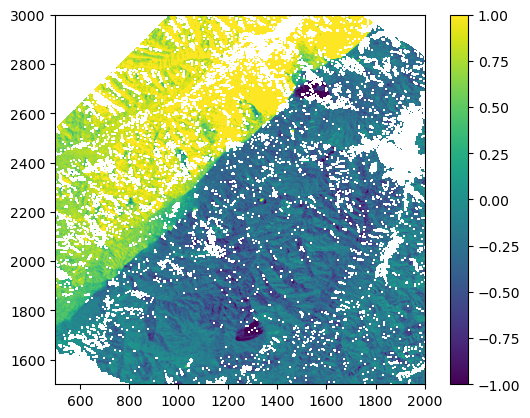

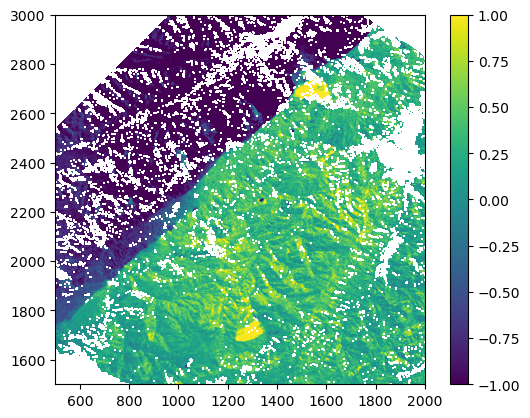

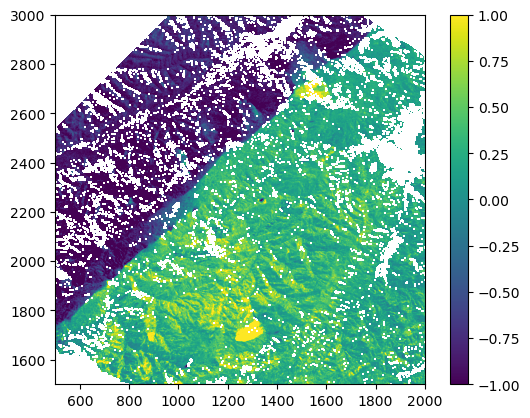

In [43]:
plt.imshow(SX,vmin=-1,vmax=1)
plt.xlim(500,2000)
plt.ylim(1500,3000)
plt.colorbar()
plt.show()
plt.imshow(SY,vmin=-1,vmax=1)
plt.xlim(500,2000)
plt.ylim(1500,3000)
plt.colorbar()
plt.show()
plt.imshow(SZ,vmin=-4,vmax=4)
plt.xlim(500,2000)
plt.ylim(1500,3000)
plt.colorbar()